## ANN Simple in Tensorflow 2.0


#### Steps for building your first ANN 

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed
- Plot The History Keyss
- Save and Load for Inference

In [2]:
# pip install tensorflow==2.0.0-rc0
# pip install tensorflow-gpu==2.0.0-rc0

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
print(tf.__version__)

2.3.0


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

In [7]:
y

0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    1
9976    0
9977    0
9978    0
9979    0
9980    0
9981    1
9982    1
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Feature Standardization 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
np.mean(X_train)

4.7477173707606696e-17

### Build ANN 

In [29]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_dim =20))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid')) 

In [30]:
 X.shape[1]

11

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [32]:
X.shape[1]

11

In [33]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
250/250 [==============================] - 0s 941us/step - loss: 0.3598 - accuracy: 0.8560 - val_loss: 0.3650 - val_accuracy: 0.8450
Epoch 2/10
250/250 [==============================] - 0s 837us/step - loss: 0.3525 - accuracy: 0.8584 - val_loss: 0.3604 - val_accuracy: 0.8445
Epoch 3/10
250/250 [==============================] - 0s 878us/step - loss: 0.3476 - accuracy: 0.8610 - val_loss: 0.3575 - val_accuracy: 0.8490
Epoch 4/10
250/250 [==============================] - 0s 863us/step - loss: 0.3449 - accuracy: 0.8620 - val_loss: 0.3552 - val_accuracy: 0.8480
Epoch 5/10
250/250 [==============================] - 0s 834us/step - loss: 0.3432 - accuracy: 0.8615 - val_loss: 0.3554 - val_accuracy: 0.8485
Epoch 6/10
250/250 [==============================] - 0s 892us/step - loss: 0.3414 - accuracy: 0.8624 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 7/10
250/250 [==============================] - 0s 902us/step - loss: 0.3408 - accuracy: 0.8611 - val_loss: 0.3532 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


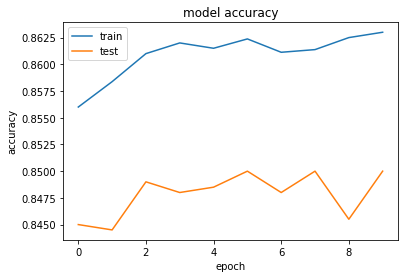

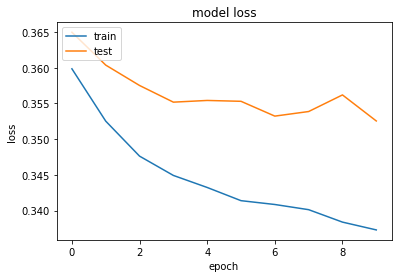

In [37]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [40]:
y_test

4876    0
9340    0
984     0
4202    0
5745    0
9819    1
2101    0
198     0
5482    0
1052    0
6330    0
43      1
7605    0
6899    1
2346    1
289     0
8051    1
7677    0
8186    1
8916    0
3713    0
820     0
5062    0
8296    0
9029    0
9289    0
7745    0
6130    0
8499    0
626     0
       ..
5456    0
3874    0
5359    1
1637    0
1475    0
8003    1
8772    0
3188    0
1852    0
8693    1
5521    0
5793    0
594     0
1865    0
9588    0
4616    0
57      0
5148    0
4984    0
1303    1
8658    0
874     0
5613    0
7140    0
397     0
7645    0
9092    1
1148    0
2809    0
2503    0
Name: Exited, Length: 2000, dtype: int64

In [41]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 412us/step - loss: 0.3525 - accuracy: 0.8500


[0.3525453507900238, 0.8500000238418579]

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
confusion_matrix(y_test, y_pred)

array([[1511,   80],
       [ 220,  189]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.85

In [45]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


### Inference

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('Customer_Churn_Modelling.csv')
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# load and evaluate a saved model

from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
accuracy: 86.80%


In [49]:
model.predict(X_test)

array([[0.28362837],
       [0.3736248 ],
       [0.13380209],
       ...,
       [0.18074548],
       [0.28819776],
       [0.13535622]], dtype=float32)